In [20]:
#Import CNN Libaries (tensorflow.keras)

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [21]:
# Import Decision Tree libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [22]:
# Created a Train Test Split
# Normalized the data by dividing by 255 to rescale the image from 0 to 1

(X_trainTree, y_trainTree), (X_testTree, y_testTree) = datasets.cifar10.load_data()

X_trainTree = X_trainTree / 255.0
X_testTree = X_testTree / 255.0

print("X_train shape: ", X_trainTree.shape)
print("y_train shape: ", y_trainTree.shape)
print("X_test shape: ", X_testTree.shape)
print("y_test shape: ", y_testTree.shape)

X_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
X_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [23]:
#Due to decision tree only going up to 2D arrays, flattened the 3D arrays of X_trainTree and X_testTree

num_samples_train, height_train, width_train, num_channels_train = X_trainTree.shape
X_trainTree_flattened = X_trainTree.reshape(num_samples_train, height_train * width_train * num_channels_train)

num_samples_test, height_test, width_test, num_channels_test = X_testTree.shape
X_testTree_flattened = X_testTree.reshape(num_samples_test, height_test * width_test * num_channels_test)



In [24]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_trainTree_flattened,y_trainTree)

#Predict the response for test dataset
y_pred = clf.predict(X_testTree_flattened)

In [25]:
# printed accuracy of the decision tree model
# used to show why a deep learning model is needed for image classification
print("Accuracy:",metrics.accuracy_score(y_testTree, y_pred))

Accuracy: 0.2696


In [26]:
# Created a Train Test Split
# Normalized the data by dividing by 255 to rescale the image from 0 to 1

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
X_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


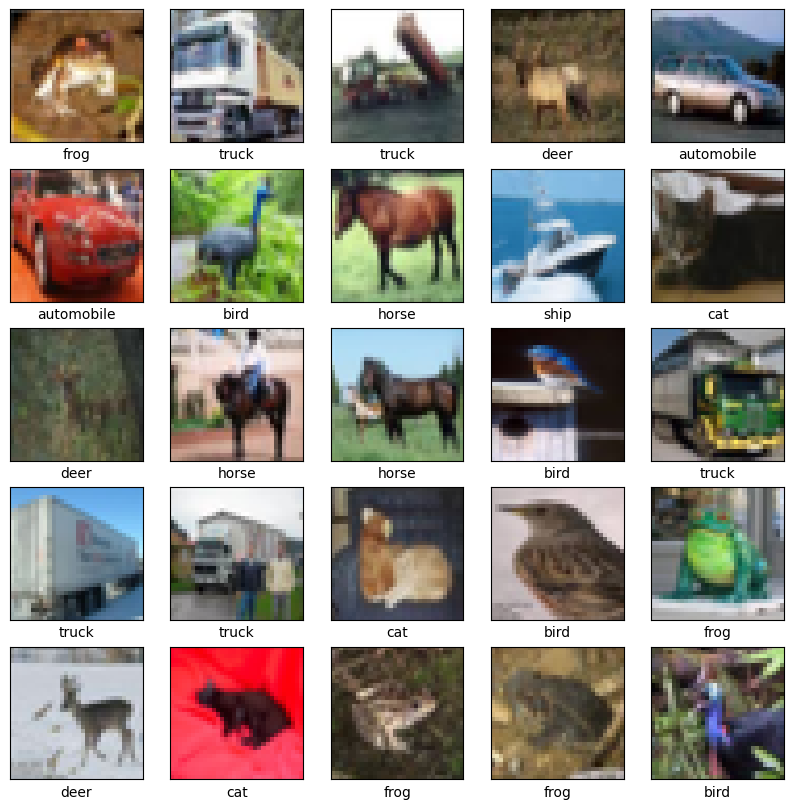

In [27]:
# Displayed the images the image cateogories in the dataset

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [28]:
# Created a train validation split for analysis

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)

X_train shape:  (40000, 32, 32, 3)
y_train shape:  (40000, 1)
X_val shape:  (10000, 32, 32, 3)
y_val shape:  (10000, 1)


In [29]:
#created a cnn model using the relu activation
#did 3 convolutions and 3 maxpoolings (2 x 2)
#then flattened the model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
#compiled the model for loss and acuracy analysis and fit the model over 20 epochs
#used the validation data for metric testing

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_val, y_val))

Epoch 1/20


2024-03-19 04:34:03.113709: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3346 - loss: 1.8026 - val_accuracy: 0.5408 - val_loss: 1.2842
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5554 - loss: 1.2593 - val_accuracy: 0.6010 - val_loss: 1.1385
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6188 - loss: 1.0835 - val_accuracy: 0.6043 - val_loss: 1.1276
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6578 - loss: 0.9743 - val_accuracy: 0.6656 - val_loss: 0.9595
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6943 - loss: 0.8776 - val_accuracy: 0.6699 - val_loss: 0.9458
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7168 - loss: 0.8024 - val_accuracy: 0.6722 - val_loss: 0.9541
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7375 - loss: 0.7506 - val_accuracy: 0.6957 - val_loss: 0.9083
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7528 - loss: 0.6976 - val

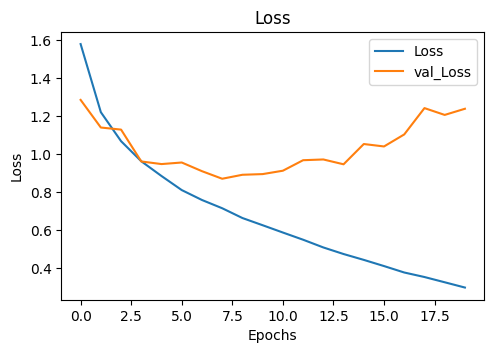

In [32]:
#graph of the loss function between the training data and the validiation data

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

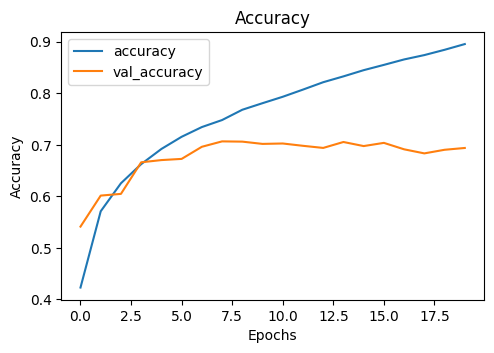

In [33]:
#graph of the accuracy between the training data and the validiation data

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [34]:
# created a new train test split in order to make a better model
# normalized the model from 0 to 1
# augmented the model to have a horizontal flip which improves generalizability

(X_trainTwo, y_trainTwo), (X_testTwo, y_testTwo) = datasets.cifar10.load_data()


X_trainTwo = X_trainTwo / 255.0
X_testTwo = X_testTwo / 255.0

X_trainTwo, X_valTwo, y_trainTwo, y_valTwo = train_test_split(X_trainTwo, y_trainTwo, test_size = 0.2)

image_generator = ImageDataGenerator(horizontal_flip = True)

train_generator = image_generator.flow(X_train, y_train)


In [35]:
# created a second model and improved problems with overfitting
# used batch normalization aafter each layer to improve the reliability and efficiency of the network
# used a dropout function to reduce overfitting by getting rid of some of the neurons
# max pooling stil used (2 x 2)

modelTwo = models.Sequential()
modelTwo.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
modelTwo.add(BatchNormalization())

modelTwo.add(Dropout(0.25))

modelTwo.add(layers.MaxPooling2D((2, 2)))
modelTwo.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelTwo.add(BatchNormalization())

modelTwo.add(layers.MaxPooling2D((2, 2)))
modelTwo.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelTwo.add(BatchNormalization())


modelTwo.add(layers.Flatten())
modelTwo.add(layers.Dense(64, activation='relu'))
modelTwo.add(layers.Dense(10))

In [36]:
# compiled the model for optimization through back propagation
# fit the model over 20 epochs and compared the training data to the validation data

modelTwo.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

historyTwo = model.fit(train_generator, epochs=20,
                    validation_data=(X_valTwo, y_valTwo))

Epoch 1/20


  18/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.7989 - loss: 0.6832

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7802 - loss: 0.6916 - val_accuracy: 0.8379 - val_loss: 0.4899
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8002 - loss: 0.6016 - val_accuracy: 0.8388 - val_loss: 0.4798
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8101 - loss: 0.5636 - val_accuracy: 0.8362 - val_loss: 0.4948
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8158 - loss: 0.5449 - val_accuracy: 0.8382 - val_loss: 0.4813
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8248 - loss: 0.5074 - val_accuracy: 0.8467 - val_loss: 0.4584
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8299 - loss: 0.4971 - val_accuracy: 0.8417 - val_loss: 0.4706
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8314 - loss: 0.4899 - val_accuracy: 0.8488 - val_loss: 0.4577
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8355 - loss: 0.4692 - va

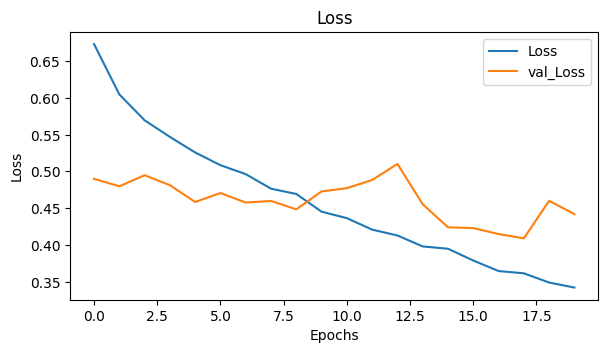

In [37]:
#graph of the loss function between the training data and the validiation data

plt.figure(figsize=(15, 16))

plt.subplot(4, 2, 2)
plt.plot(historyTwo.history['loss'], label='Loss')
plt.plot(historyTwo.history['val_loss'], label='val_Loss')
plt.title('Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

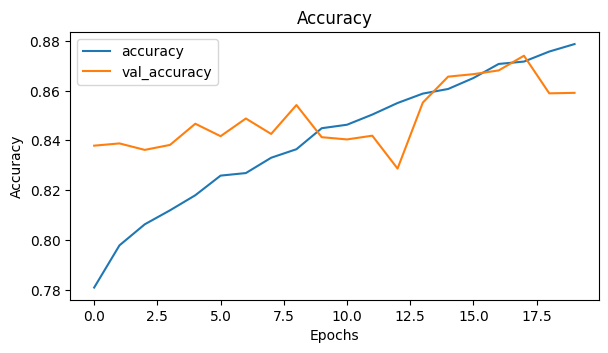

In [38]:
#graph of the accuracy between the training data and the validiation data

plt.figure(figsize=(15, 16))

plt.subplot(4, 2, 2)
plt.plot(historyTwo.history['accuracy'], label='accuracy')
plt.plot(historyTwo.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()